# General analysis from association rules

## Run all year-by-year notebooks to generate association rules

### Run analysis for 2019

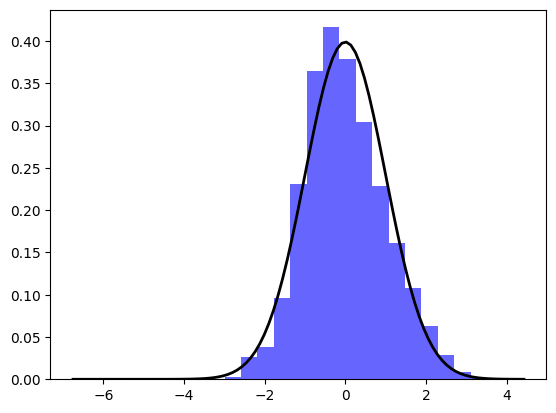

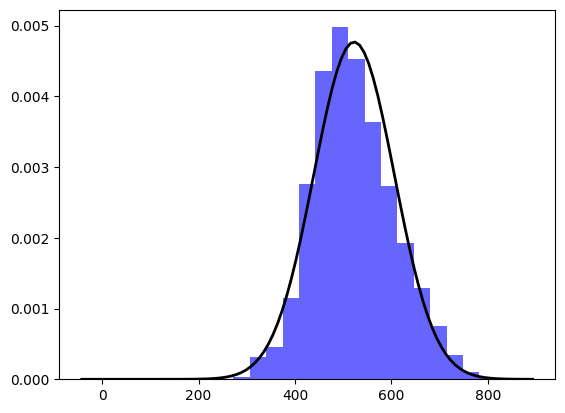

Time to run apriori: 1:45:41.459357
Count of itemsets: 10008
Count of association rules for support 10.0% and confidence 50.0%: 291866


In [1]:
%run 'analysis-2019.ipynb'

### Run analysis for 2020

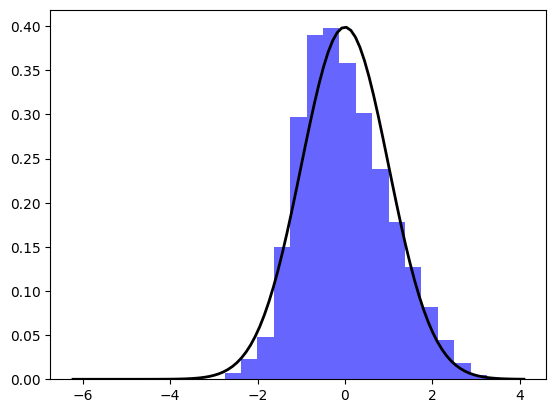

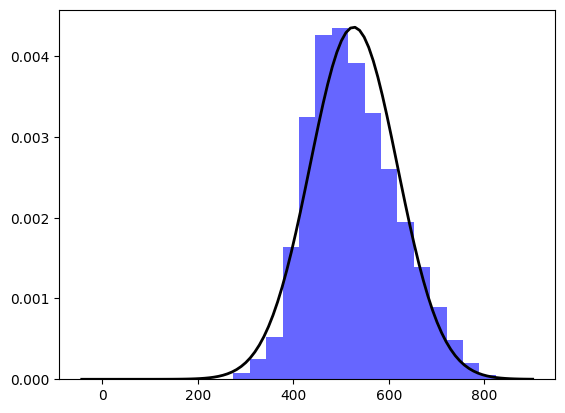

Time to run apriori: 1:52:14.006531
Count of itemsets: 13073
Count of association rules for support 10.0% and confidence 50.0%: 485076


In [2]:
%run 'analysis-2020.ipynb'

### Run analysis for 2021

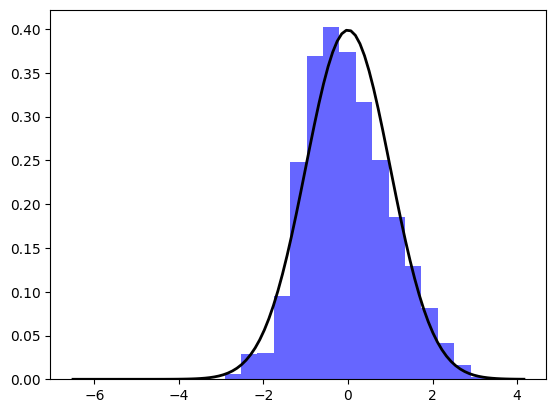

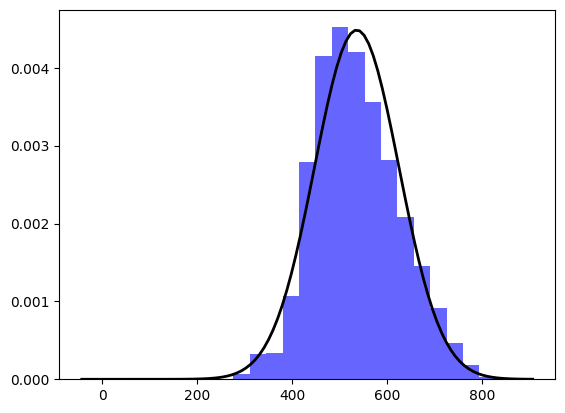

Time to run apriori: 1:27:46.859478
Count of itemsets: 12015
Count of association rules for support 10.0% and confidence 50.0%: 411157


In [3]:
%run 'analysis-2021.ipynb'

### Run analysis for 2022

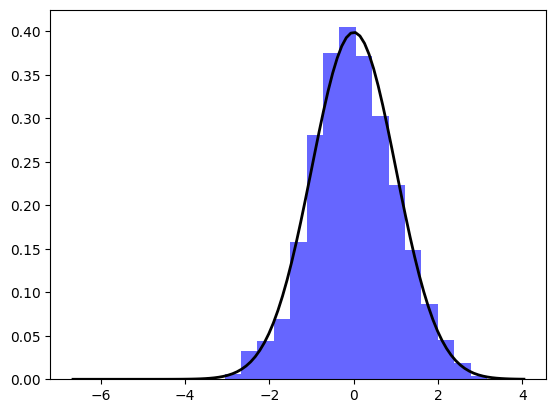

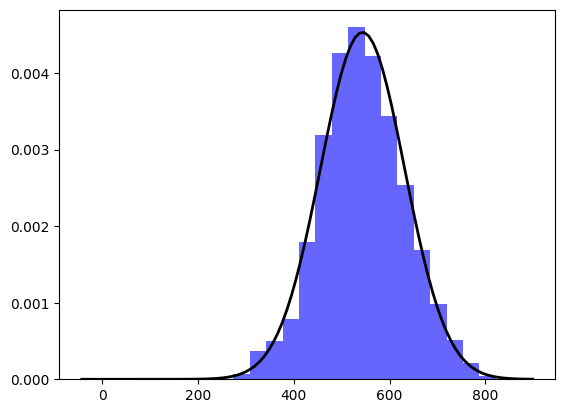

Time to run apriori: 0:57:03.112358
Count of itemsets: 10066
Count of association rules for support 10.0% and confidence 50.0%: 272535


In [4]:
%run 'analysis-2022.ipynb'

## Import all rules results

In [5]:
%run '../scripts/import-all-rules-results.py'

all_rules

,items_base,items_add,support,confidence,lift,year
0,[],['Dependencia administrativa nao informada'],0.713842,0.713842,1.000000,2019
1,[],['Entre 17 e 25 anos'],0.813179,0.813179,1.000000,2019
2,[],['Feminino'],0.537954,0.537954,1.000000,2019
3,[],['Já concluí o Ensino Médio'],0.528198,0.528198,1.000000,2019
4,[],['NOTA: MUITO ACIMA DA MÉDIA'],0.644401,0.644401,1.000000,2019
...,...,...,...,...,...,...
1460629,"['Solteiro(a)', 'Branco', 'Tem computador', 'N...",['Já concluí o Ensino Médio'],0.111337,0.967369,2.056718,2022
1460630,"['Solteiro(a)', 'Branco', 'Tem computador', 'J...",['Feminino'],0.111337,0.594778,1.051158,2022
1460631,"['Solteiro(a)', 'Branco', 'Tem computador', 'J...",['Entre 17 e 25 anos'],0.111337,0.949476,1.122392,2022
1460632,"['Solteiro(a)', 'Branco', 'Tem computador', 'J...",['Dependencia administrativa nao informada'],0.111337,1.000000,1.468439,2022


## ECDF - Support x Association Rules Qty

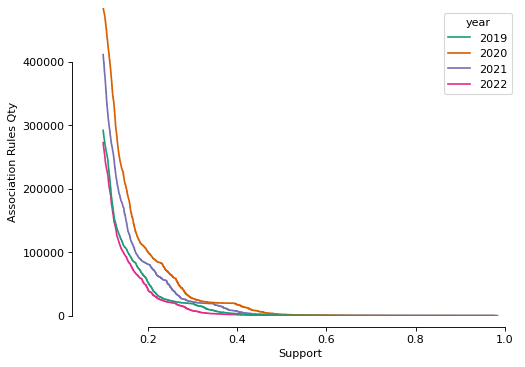

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Support")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_rules, stat="count", complementary=True, x="support", hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Confidence x Association Rules Qty

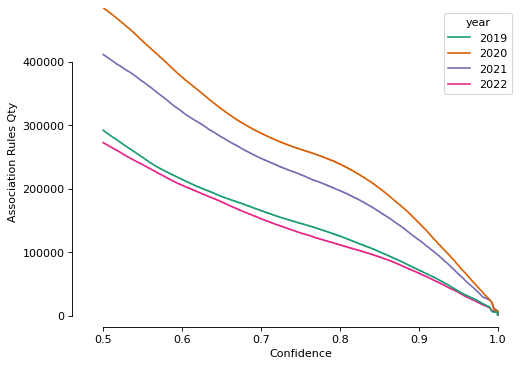

In [7]:
# charts
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Confidence")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_rules, stat="count", x="confidence", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Support x Association Rules Qty - NOTA MUITO ACIMA DA MÉDIA

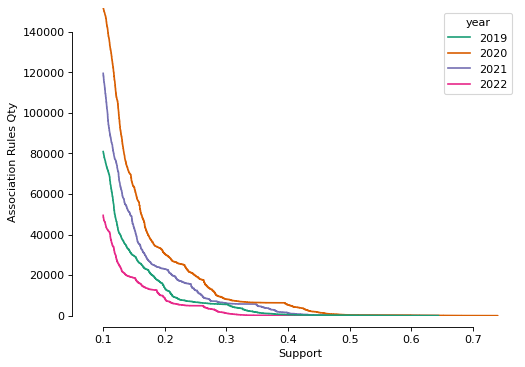

In [8]:
all_high_performance_rules = all_rules.query("items_add.str.contains('NOTA: MUITO ACIMA DA MÉDIA')")

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Support")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_high_performance_rules, stat="count", x="support", complementary=True,  hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Confidence x Association Rules Qty - NOTA MUITO ACIMA DA MÉDIA

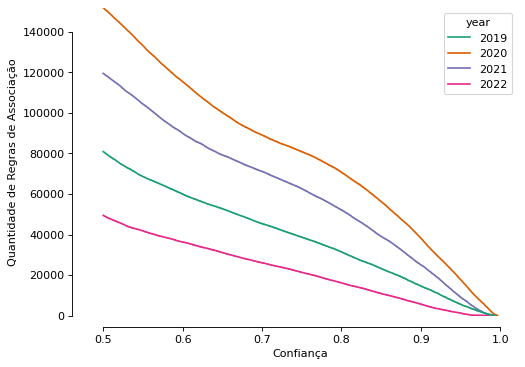

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Confiança")
plt.ylabel("Quantidade de Regras de Associação")
ax = sns.ecdfplot(data=all_high_performance_rules, stat="count", x="confidence", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Support x Association Rules Qty - NOTA MUITO ABAIXO DA MÉDIA

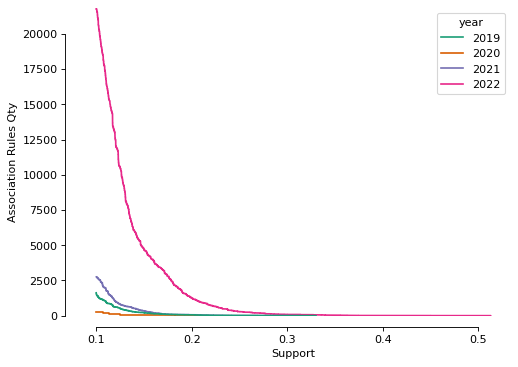

In [10]:
all_low_performance_rules = all_rules.query("items_add.str.contains('NOTA: MUITO ABAIXO DA MÉDIA')")

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Support")
plt.ylabel("Association Rules Qty")
ax = sns.ecdfplot(data=all_low_performance_rules, stat="count", x="support", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## ECDF - Confidence x Association Rules Qty - NOTA MUITO ABAIXO DA MÉDIA

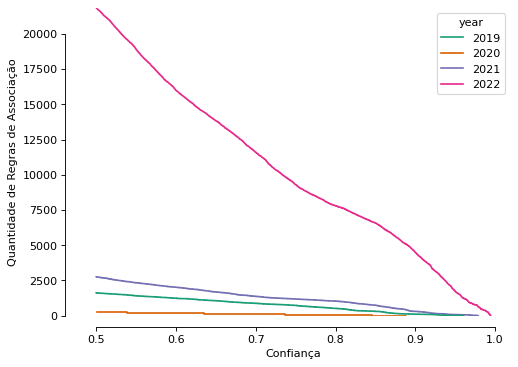

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(7, 5), dpi=80)

plt.xlabel("Confiança")
plt.ylabel("Quantidade de Regras de Associação")
ax = sns.ecdfplot(data=all_low_performance_rules, stat="count", x="confidence", complementary=True, hue="year", 
                  palette='Dark2', linewidth=1.5)
sns.despine(trim=True, offset=10)
figure = ax.get_figure()

## Filter by relevant rules (lift > 1.1)

In [12]:
relevant_rules_table_2019 = rules_table_2019.query("lift > 1.1")
relevant_rules_table_2020 = rules_table_2020.query("lift > 1.1")
relevant_rules_table_2021 = rules_table_2021.query("lift > 1.1")
relevant_rules_table_2022 = rules_table_2022.query("lift > 1.1")

print("2019: " + str(relevant_rules_table_2019['items_base'].count()))
print("2020: " + str(relevant_rules_table_2020['items_base'].count()))
print("2021: " + str(relevant_rules_table_2021['items_base'].count()))
print("2022: " + str(relevant_rules_table_2022['items_base'].count()))

2019: 255215
2020: 414244
2021: 354631
2022: 236888


## Recurring rules

In [13]:
intersec_19_20 = pd.merge(relevant_rules_table_2019, relevant_rules_table_2020, how = 'inner', on = ['items_base', 'items_add'], suffixes=('_x', '_y'))
intersec_19_20_21 = pd.merge(intersec_19_20, relevant_rules_table_2021, how = 'inner', on = ['items_base', 'items_add'], suffixes=('_z', '_w'))
intersec_all_years = pd.merge(intersec_19_20_21, relevant_rules_table_2022, how = 'inner', on = ['items_base', 'items_add'], suffixes=('_a', '_b'))
intersec_all_years

,items_base,items_add,support_x,confidence_x,lift_x,year_x,support_y,confidence_y,lift_y,year_y,support_a,confidence_a,lift_a,year_a,support_b,confidence_b,lift_b,year_b
0,['Classe Social C'],['Branco'],0.152835,0.678327,1.373689,2019,0.162423,0.706572,1.293499,2020,0.163953,0.728746,1.347538,2021,0.123896,0.738252,1.564450,2022
1,['Mãe Graduação completa'],['Branco'],0.140582,0.674365,1.365665,2019,0.156443,0.687755,1.259052,2020,0.148962,0.702884,1.299717,2021,0.119311,0.686219,1.454184,2022
2,['Mãe Pós-graduação completa'],['Branco'],0.145581,0.688444,1.394176,2019,0.177837,0.706702,1.293737,2020,0.175490,0.723933,1.338638,2021,0.144412,0.715200,1.515598,2022
3,['Branco'],['NOTA: MUITO ACIMA DA MÉDIA'],0.420352,0.851260,1.321009,2019,0.493427,0.903301,1.220094,2020,0.453407,0.838403,1.298055,2021,0.348986,0.739545,1.518887,2022
4,['NOTA: MUITO ACIMA DA MÉDIA'],['Branco'],0.420352,0.652314,1.321009,2019,0.493427,0.666475,1.220094,2020,0.453407,0.701985,1.298055,2021,0.348986,0.716752,1.518887,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150254,"['Solteiro(a)', 'Branco', 'Tem computador', 'J...",['NOTA: MUITO ACIMA DA MÉDIA'],0.114535,0.976637,1.515573,2019,0.158490,0.989824,1.336961,2020,0.146359,0.977646,1.513636,2021,0.111337,0.962302,1.976388,2022
150255,"['Solteiro(a)', 'Branco', 'Tem computador', 'N...",['Já concluí o Ensino Médio'],0.114535,0.958389,1.814449,2019,0.158490,0.973691,1.597382,2020,0.146359,0.970590,1.816117,2021,0.111337,0.967369,2.056718,2022
150256,"['Solteiro(a)', 'Branco', 'Tem computador', 'J...",['Entre 17 e 25 anos'],0.114535,0.955518,1.175041,2019,0.158490,0.953943,1.135693,2020,0.146359,0.948012,1.125752,2021,0.111337,0.949476,1.122392,2022
150257,"['Solteiro(a)', 'Branco', 'Tem computador', 'J...",['Dependencia administrativa nao informada'],0.114535,1.000000,1.400870,2019,0.158490,1.000000,1.350550,2020,0.146359,1.000000,1.416079,2021,0.111337,1.000000,1.468439,2022


## Save results to a new CSV file

In [14]:
import os
intersec_all_years.to_csv('results/intersection-all-years.csv')

## View data of interest

In [15]:
intersec_all_years.query("items_add.str.contains('NOTA: MUITO ACIMA DA MÉDIA')")

,items_base,items_add,support_x,confidence_x,lift_x,year_x,support_y,confidence_y,lift_y,year_y,support_a,confidence_a,lift_a,year_a,support_b,confidence_b,lift_b,year_b
3,['Branco'],['NOTA: MUITO ACIMA DA MÉDIA'],0.420352,0.851260,1.321009,2019,0.493427,0.903301,1.220094,2020,0.453407,0.838403,1.298055,2021,0.348986,0.739545,1.518887,2022
10,['Classe Social C'],['NOTA: MUITO ACIMA DA MÉDIA'],0.219298,0.973313,1.510415,2019,0.226795,0.986603,1.332610,2020,0.215612,0.958359,1.483775,2021,0.158446,0.944125,1.939057,2022
12,['Classe Social D'],['NOTA: MUITO ACIMA DA MÉDIA'],0.146098,0.888072,1.378136,2019,0.189362,0.932297,1.259259,2020,0.154721,0.842261,1.304028,2021,0.117142,0.784482,1.611180,2022
34,['Mãe Graduação completa'],['NOTA: MUITO ACIMA DA MÉDIA'],0.194682,0.933880,1.449222,2019,0.215782,0.948622,1.281308,2020,0.191225,0.902302,1.396986,2021,0.146007,0.839762,1.724713,2022
36,['Mãe Pós-graduação completa'],['NOTA: MUITO ACIMA DA MÉDIA'],0.201946,0.954989,1.481979,2019,0.243557,0.967863,1.307298,2020,0.223420,0.921658,1.426954,2021,0.178811,0.885559,1.818772,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150224,"['Solteiro(a)', 'Branco', 'Tem computador', 'J...","['Feminino', 'NOTA: MUITO ACIMA DA MÉDIA']",0.114535,0.566091,1.675724,2019,0.158490,0.593635,1.484278,2020,0.146359,0.587135,1.685305,2021,0.111337,0.569036,2.224006,2022
150231,"['Solteiro(a)', 'Branco', 'Tem computador', 'J...","['NOTA: MUITO ACIMA DA MÉDIA', 'Entre 17 e 25 ...",0.114535,0.924454,1.634037,2019,0.158490,0.938570,1.407423,2020,0.146359,0.920278,1.590580,2021,0.111337,0.907219,2.065577,2022
150239,"['Solteiro(a)', 'Branco', 'Tem computador', 'J...","['NOTA: MUITO ACIMA DA MÉDIA', 'Dependencia ad...",0.114535,0.976637,2.046069,2019,0.158490,0.989824,1.829496,2020,0.146359,0.977646,2.074198,2021,0.111337,0.962302,2.701502,2022
150248,"['Solteiro(a)', 'Tem computador', 'Já concluí ...","['Branco', 'NOTA: MUITO ACIMA DA MÉDIA']",0.114535,0.627125,1.491904,2019,0.158490,0.665723,1.349182,2020,0.146359,0.682974,1.506317,2021,0.111337,0.673727,1.930530,2022


In [16]:
intersec_all_years.query("items_add.str.contains('NOTA: MUITO ABAIXO DA MÉDIA')")

,items_base,items_add,support_x,confidence_x,lift_x,year_x,support_y,confidence_y,lift_y,year_y,support_a,confidence_a,lift_a,year_a,support_b,confidence_b,lift_b,year_b
15,['Classe Social E'],['NOTA: MUITO ABAIXO DA MÉDIA'],0.330243,0.716345,2.014476,2019,0.242099,0.582680,2.244132,2020,0.313478,0.710366,2.006073,2021,0.469317,0.821316,1.600692,2022
39,['Não tem computador'],['NOTA: MUITO ABAIXO DA MÉDIA'],0.256183,0.842617,2.369573,2019,0.192442,0.789964,3.042465,2020,0.241015,0.882451,2.492039,2021,0.373082,0.929626,1.811780,2022
289,"['Classe Social E', 'Dependencia administrativ...",['NOTA: MUITO ABAIXO DA MÉDIA'],0.217493,0.679807,1.911724,2019,0.186334,0.563080,2.168645,2020,0.206769,0.658151,1.858616,2021,0.296311,0.774252,1.508967,2022
300,"['Classe Social E', 'Entre 17 e 25 anos']",['NOTA: MUITO ABAIXO DA MÉDIA'],0.230479,0.665412,1.871244,2019,0.161536,0.512227,1.972789,2020,0.235428,0.677109,1.912154,2021,0.374398,0.806022,1.570884,2022
314,"['Feminino', 'Classe Social E']",['NOTA: MUITO ABAIXO DA MÉDIA'],0.189218,0.734292,2.064946,2019,0.138486,0.599882,2.310383,2020,0.180704,0.722549,2.040476,2021,0.289422,0.840092,1.637284,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33006,"['Não tem computador', 'Classe Social E', 'Ent...","['NOTA: MUITO ABAIXO DA MÉDIA', 'Tem celular']",0.157095,0.834048,2.457668,2019,0.114626,0.771310,3.101354,2020,0.159809,0.865004,2.532337,2021,0.263635,0.904398,1.833356,2022
33007,"['Não tem computador', 'Classe Social E', 'Ent...","['NOTA: MUITO ABAIXO DA MÉDIA', 'Solteiro(a)']",0.157095,0.840052,2.756284,2019,0.114626,0.774735,3.527335,2020,0.159809,0.860653,2.741136,2021,0.263635,0.901882,1.944085,2022
33009,"['Não tem computador', 'Classe Social E', 'Tem...","['NOTA: MUITO ABAIXO DA MÉDIA', 'Entre 17 e 25...",0.157095,0.696387,2.814475,2019,0.114626,0.632538,3.654292,2020,0.159809,0.745106,2.827365,2021,0.263635,0.801430,1.970416,2022
33013,"['Não tem computador', 'Entre 17 e 25 anos', '...","['NOTA: MUITO ABAIXO DA MÉDIA', 'Classe Social...",0.157095,0.775716,2.348921,2019,0.114626,0.707359,2.921783,2020,0.159809,0.825146,2.632232,2021,0.263635,0.891210,1.898951,2022


## Generate WordCloud for NOTAS MUITO ACIMA DA MÉDIA

In [17]:
all_high = intersec_all_years.query("items_add.str.contains('NOTA: MUITO ACIMA DA MÉDIA')")

xss = all_high['items_base'].to_numpy()
flat_list = [x for xs in xss for x in xs]

# Transform into a string compatible with WordCloud
words = ''.join(flat_list)

words = words.replace(" ", "").replace("[", "").replace("]", " ").replace("NãoRespondeu", "").replace(",", " ").replace("'", "").replace(":", "").replace(".", "").replace("-", "").replace("(", "").replace(")", "")

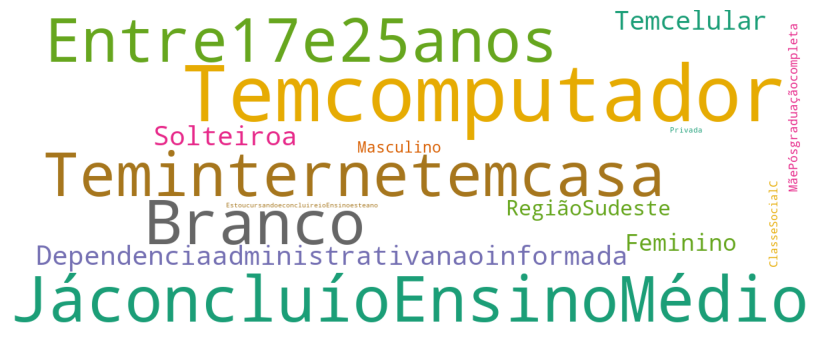

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1200, height = 500,
                background_color ='white', colormap="Dark2",
                min_font_size = 10, collocations=False).generate(words)
                 
ax = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

figure = ax.get_figure()

## Generate WordCloud for NOTAS MUITO ABAIXO DA MÉDIA

In [19]:
all_low = intersec_all_years.query("items_add.str.contains('NOTA: MUITO ABAIXO DA MÉDIA')")

xss = all_low['items_base'].to_numpy()
flat_list = [x for xs in xss for x in xs]

# Transform into a string compatible with WordCloud
words2 = ''.join(flat_list)

words2 = words2.replace(" ", "").replace("[", "").replace("]", " ").replace("NãoRespondeu", "").replace(",", " ").replace("'", "").replace(":", "").replace(".", "").replace("-", "")

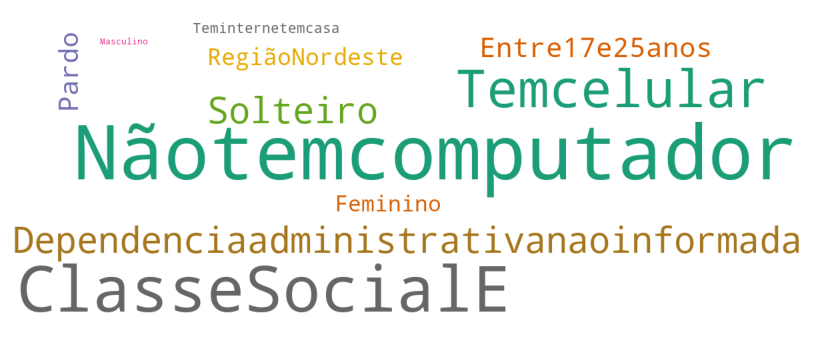

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1200, height = 500,
                background_color ='white', colormap="Dark2",
                min_font_size = 10, collocations=False).generate(words2)
                    
ax = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

figure = ax.get_figure()